In [38]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [10]:
#loading data
breast_cancer=pd.read_csv('breast-cancer.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
breast_cancer.shape

(569, 32)

In [12]:
#to check if there is any null value
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
breast_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [15]:
#now make categorical data to numerical
labels=LabelEncoder()
breast_cancer['diagnosis']=labels.fit_transform(breast_cancer['diagnosis'])

In [16]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
breast_cancer['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

B-->0-->Benige <br>
M--->1-->Malignant

In [18]:
#checking mean of two class labels for the features
breast_cancer.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [19]:
#splitting
X=breast_cancer.drop('diagnosis',axis=1)
y=breast_cancer['diagnosis']

In [20]:
print("The values present in X are:",X)

The values present in X are:            id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760 

In [21]:
print("The values present in Y are:",y)

The values present in Y are: 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(569, 31) (398, 31) (171, 31)


In [23]:
print(X_train.std())
print()
print(X_test.std())

id                         1.270358e+08
radius_mean                3.535730e+00
texture_mean               4.214074e+00
perimeter_mean             2.428953e+01
area_mean                  3.588655e+02
smoothness_mean            1.376621e-02
compactness_mean           5.120864e-02
concavity_mean             7.783607e-02
concave points_mean        3.771151e-02
symmetry_mean              2.687089e-02
fractal_dimension_mean     7.248265e-03
radius_se                  2.904525e-01
texture_se                 5.193479e-01
perimeter_se               2.114108e+00
area_se                    4.888364e+01
smoothness_se              3.113979e-03
compactness_se             1.799507e-02
concavity_se               3.005513e-02
concave points_se          6.233963e-03
symmetry_se                8.016395e-03
fractal_dimension_se       2.650919e-03
radius_worst               4.799691e+00
texture_worst              6.017564e+00
perimeter_worst            3.308320e+01
area_worst                 5.707539e+02


<h4> Model Training <h4>

In [24]:
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

<h4> Model Evaulation<h4>

In [25]:
#accuracy before standardizing
X_train_pred=model.predict(X_train)
accuracy=accuracy_score(y_train,X_train_pred)
print("Accuracy of Training data is ",accuracy)

X_test_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,X_test_pred)
print("Accuracy of test data is ",accuracy)

Accuracy of Training data is  0.6256281407035176
Accuracy of test data is  0.631578947368421


In [26]:
#standardizing data
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)

In [27]:
print(X_train_std.std())
print()
print(X_test_std.std())

1.0

1.0218641132111035


In [28]:
model_2=LogisticRegression()
model_2.fit(X_train_std,y_train)

LogisticRegression()

In [53]:
#Accuracy after standardizing
X_train_pred=model_2.predict(X_train_std)
train_accuracy_logistic=accuracy_score(y_train,X_train_pred)
print("Accuracy of Training data is ",accuracy)

Accuracy of Training data is  0.9824561403508771


In [54]:
X_test_pred=model_2.predict(X_test_std)
test_accuracy_logistic=accuracy_score(y_test,X_test_pred)
print("Accuracy of test data is ",accuracy)

Accuracy of test data is  0.9824561403508771


<h4>SVM</h4>

In [44]:
data= pd.read_csv('breast-cancer.csv')

labelsvm=LabelEncoder()
data['diagnosis']=labelsvm.fit_transform(data['diagnosis'])
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
#splitting
X_svm=data.drop('diagnosis',axis=1)
y_svm=data['diagnosis']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std2 = scaler.fit_transform(X_train_2)
X_test_std2 = scaler.transform(X_test_2)

In [52]:
# Train the SVM model
model3 = SVC(kernel='linear', random_state=42)
model3.fit(X_train_std2, y_train_2)

# Make predictions
X_train_pred2 = model3.predict(X_train_std2)
X_test_pred2 = model3.predict(X_test_std2)

# Calculate and print the accuracy
train_accuracy_svm = accuracy_score(y_train_2, X_train_pred2)
test_accuracy_svm = accuracy_score(y_test_2, X_test_pred2)
print("Accuracy of Training data is ", train_accuracy)
print("Accuracy of Test data is ", test_accuracy)

Accuracy of Training data is  0.9773869346733668
Accuracy of Test data is  0.9590643274853801


<h4>KNN</h4>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X_knn=data.drop('diagnosis',axis=1)
y_knn=data['diagnosis']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [51]:
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train_std, y_train)

# Make predictions
X_train_pred = model4.predict(X_train_std)
X_test_pred = model4.predict(X_test_std)

# Calculate and print the accuracy
train_accuracy_knn = accuracy_score(y_train, X_train_pred)
test_accuracy_knn = accuracy_score(y_test, X_test_pred)
print("Accuracy of Training data is ", train_accuracy)
print("Accuracy of Test data is ", test_accuracy)

Accuracy of Training data is  0.9773869346733668
Accuracy of Test data is  0.9590643274853801


<h3>Comparing the 3 models</h3>

In [56]:
import matplotlib.pyplot as plt

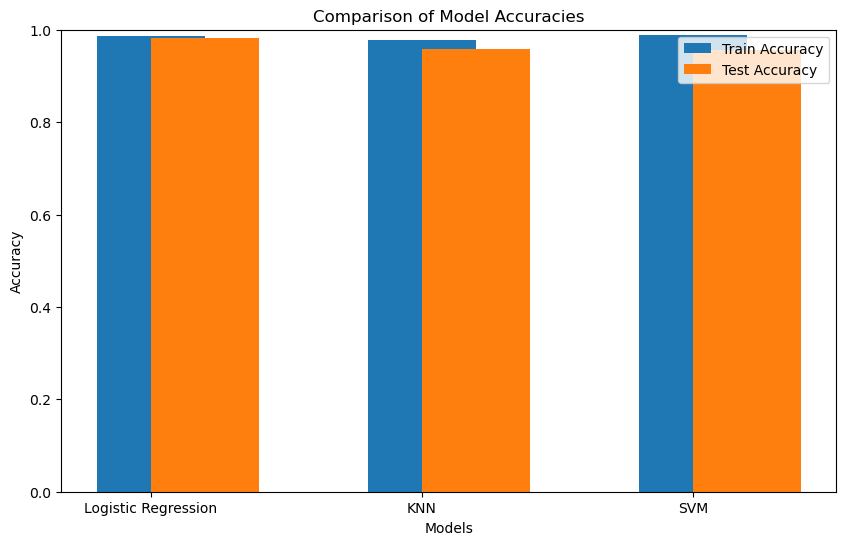

In [57]:
models = ['Logistic Regression', 'KNN', 'SVM']
train_accuracies = [train_accuracy_logistic, train_accuracy_knn, train_accuracy_svm]
test_accuracies = [test_accuracy_logistic, test_accuracy_knn, test_accuracy_svm]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.show()

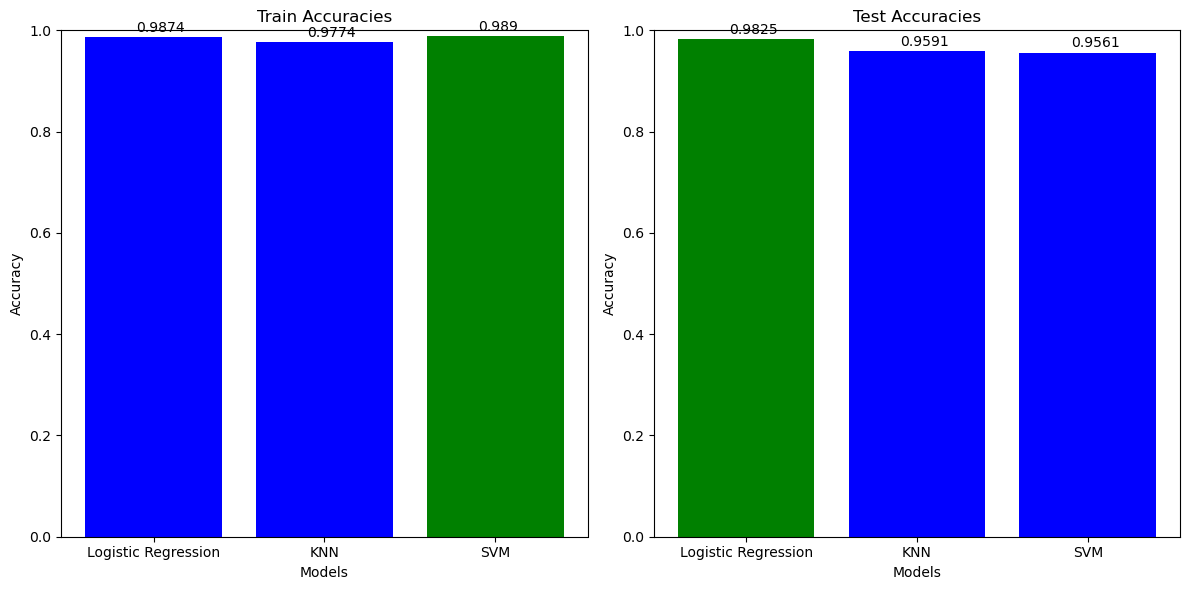

In [59]:
# Plotting the results
models = ['Logistic Regression', 'KNN', 'SVM']
train_accuracies = [train_accuracy_logistic, train_accuracy_knn, train_accuracy_svm]
test_accuracies = [test_accuracy_logistic, test_accuracy_knn, test_accuracy_svm]

# Determine the best model for training and testing
best_train_accuracy = max(train_accuracies)
best_test_accuracy = max(test_accuracies)

best_train_model = models[train_accuracies.index(best_train_accuracy)]
best_test_model = models[test_accuracies.index(best_test_accuracy)]

x = range(len(models))

plt.figure(figsize=(12, 6))

# Bar chart for train accuracies
plt.subplot(1, 2, 1)
bars_train = plt.bar(x, train_accuracies, color=['blue' if acc != best_train_accuracy else 'green' for acc in train_accuracies])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train Accuracies')
plt.xticks(x, models)
plt.ylim(0, 1)
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, round(yval, 4))

# Bar chart for test accuracies
plt.subplot(1, 2, 2)
bars_test = plt.bar(x, test_accuracies, color=['blue' if acc != best_test_accuracy else 'green' for acc in test_accuracies])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracies')
plt.xticks(x, models)
plt.ylim(0, 1)
for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, round(yval, 4))

plt.tight_layout()
plt.show()